In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = pd.read_csv("/content/drive/My Drive/ML Project Taxi Fair/train.csv")

In [ ]:
dataframe.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
#Convert label to  binary
def convert_b(x):
  if(x=='correct'):
    return 1
  else:
    return 0

dataframe['label'] = dataframe['label'].apply(lambda x: convert_b(x))

In [ ]:
dataframe.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


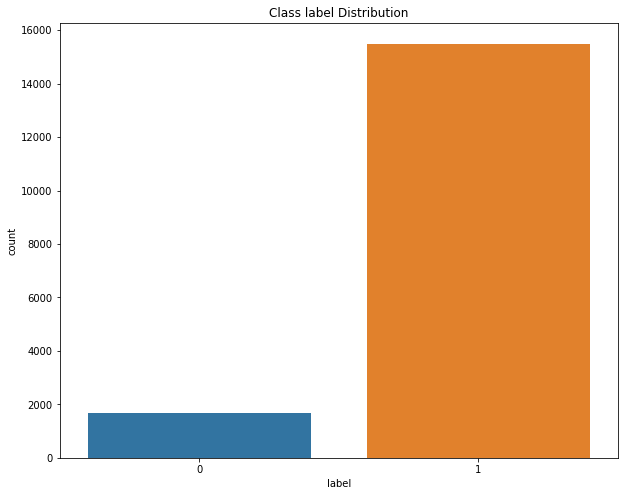

In [ ]:
#Label Class Distribution
f, ax = plt.subplots(1, 1 , figsize=(10,8))
ax.set_title("Class label Distribution")
sns.countplot(x='label', data=dataframe, ax=ax)


In [ ]:
# Dataset data columns and data types
dataframe.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                          int64
dtype: object

In [ ]:
#NaN count for each column
dataframe.isna().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [ ]:
#NaN percentage for each column
dataframe.isna().sum()/dataframe.shape[0]*100

tripid                       0.000000
additional_fare              1.176060
duration                     1.176060
meter_waiting                1.176060
meter_waiting_fare           1.176060
meter_waiting_till_pickup    1.176060
pickup_time                  0.000000
drop_time                    0.000000
pick_lat                     0.000000
pick_lon                     0.000000
drop_lat                     0.000000
drop_lon                     0.000000
fare                         0.797625
label                        0.000000
dtype: float64

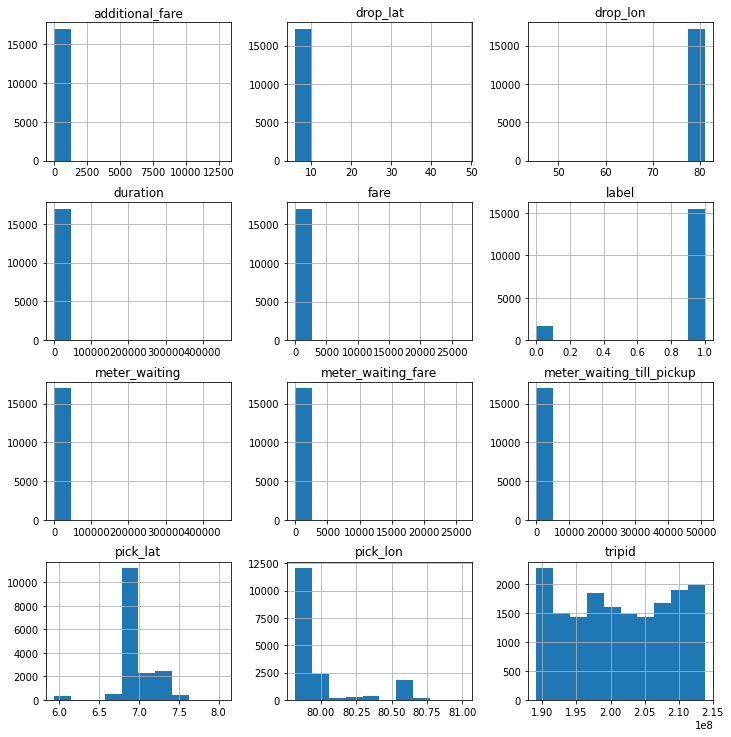

In [ ]:
#Plot the histograms
f,ax = plt.subplots(4,3, figsize=(10,10))
f.tight_layout()
dataframe.hist(ax=ax)
plt.show()

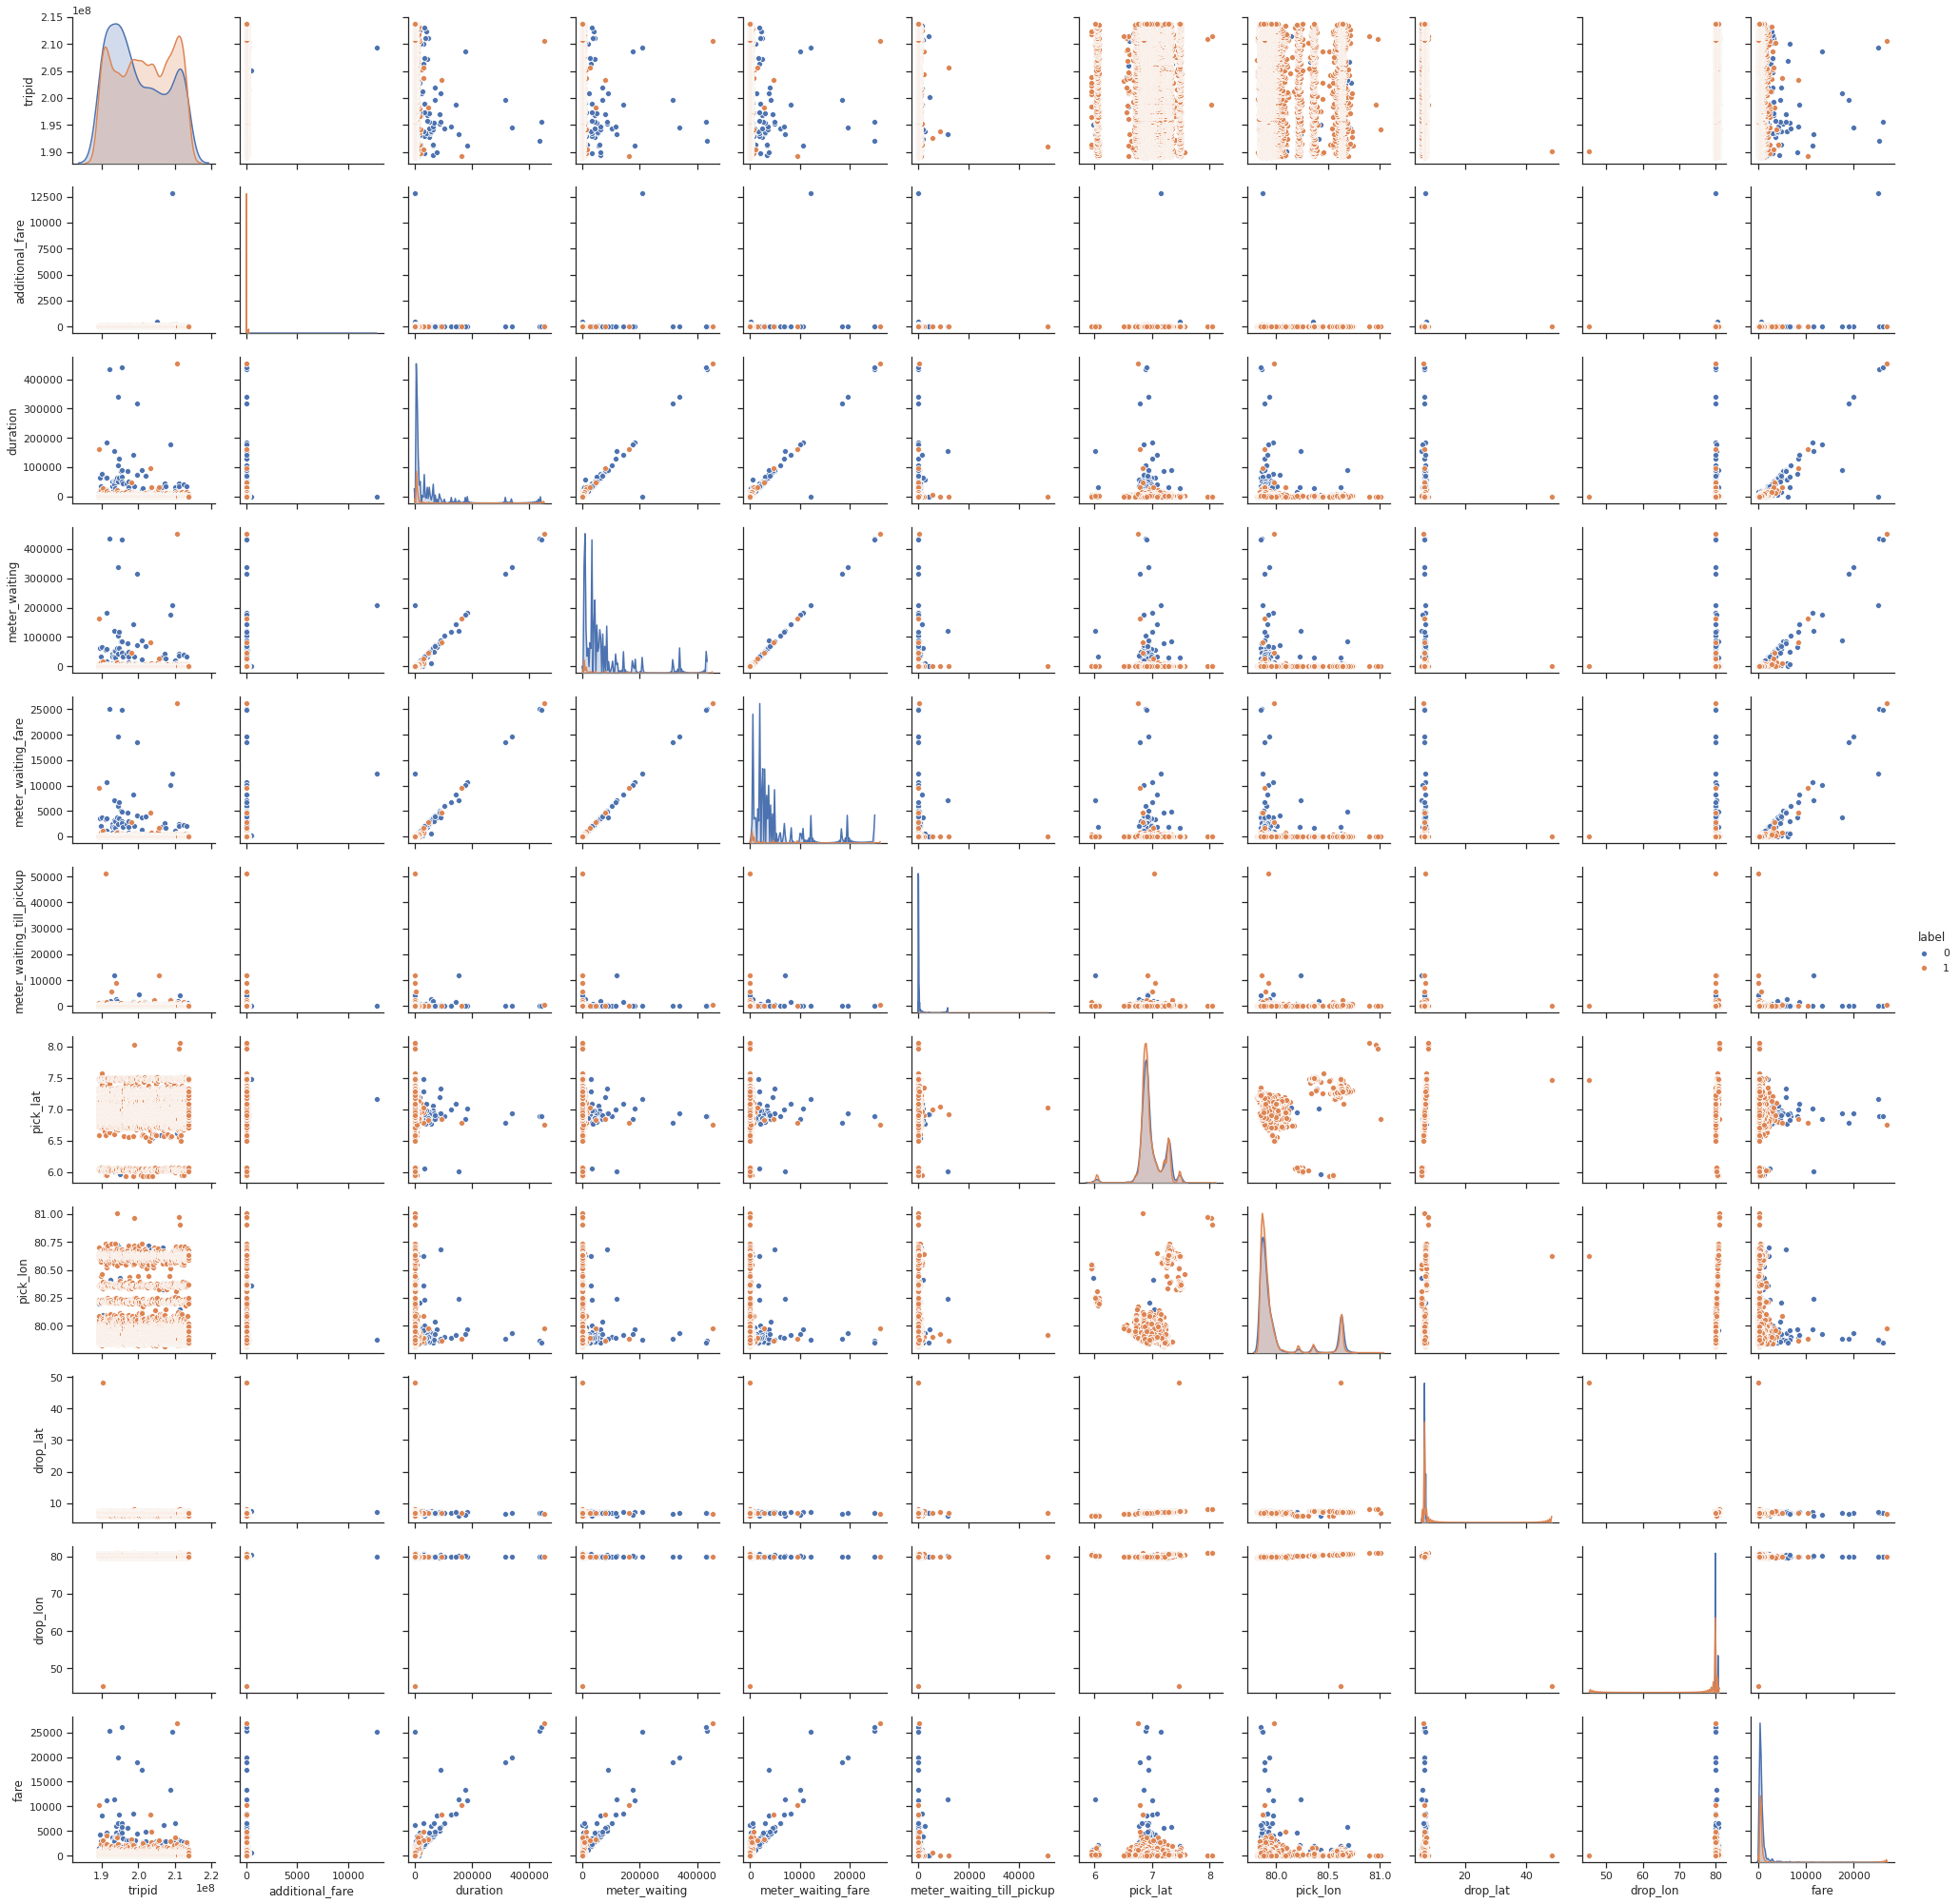

In [ ]:
#Data are highly skewed
sns.set(style="ticks")
sns.pairplot(dataframe, hue="label")

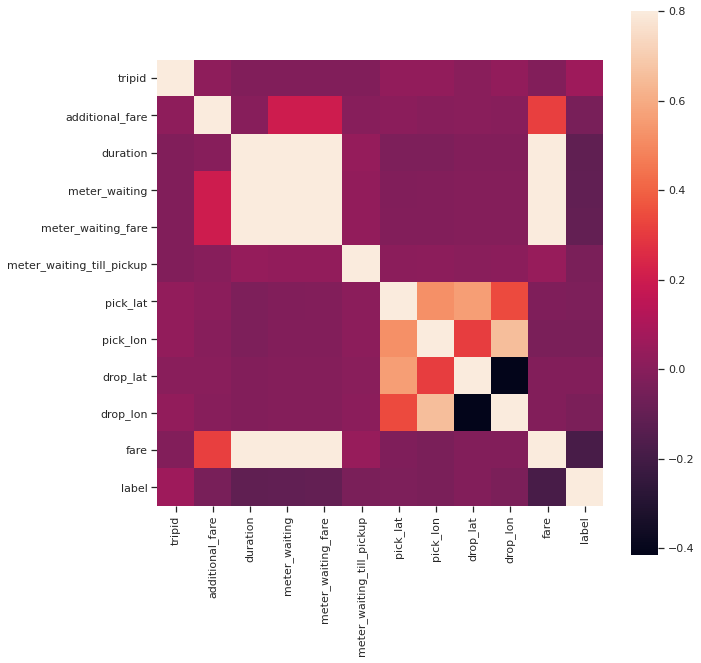

In [ ]:
#Correlation metric
corr_metric = dataframe.corr()
f, ax= plt.subplots(1,1, figsize=(10,10))
sns.heatmap(corr_metric, vmax=.8, square=True, fmt='.2f')

In [ ]:
#Fare and additional faire is little high correlated
#meter_waiting, meter_waiting_fare, duration has high positive correlation with fare feature
#fare is the negative correlation with label

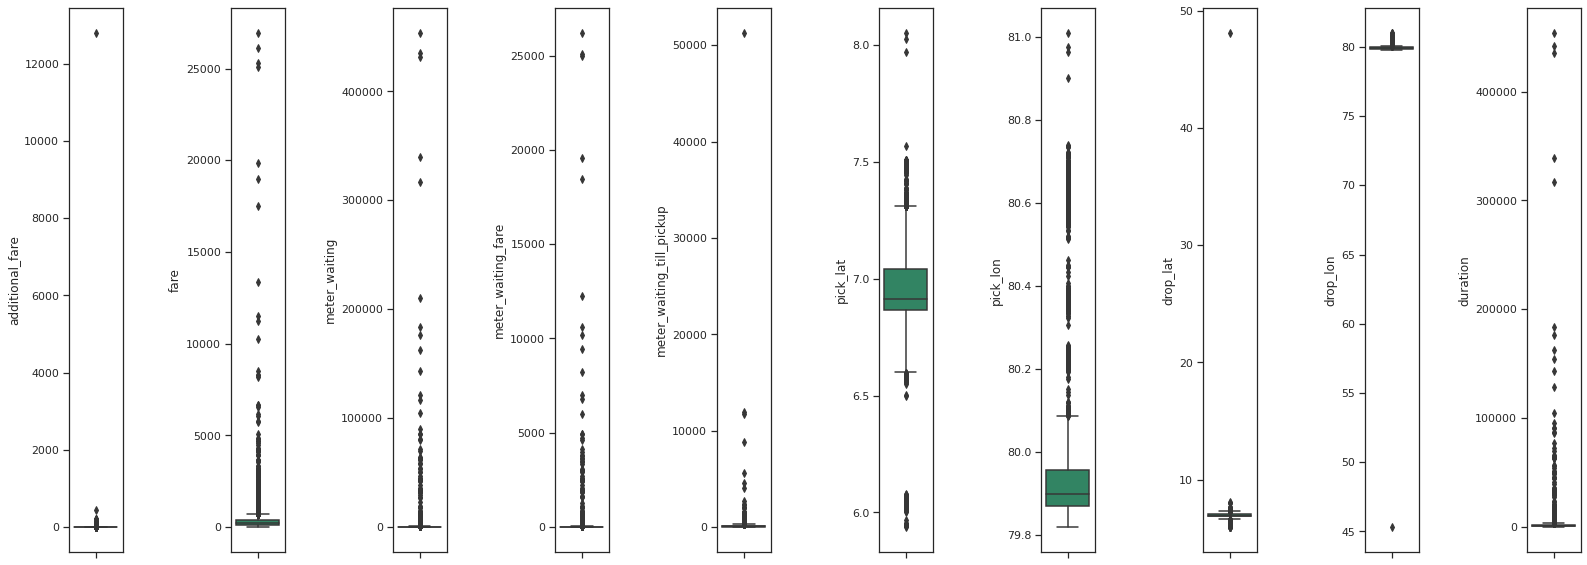

In [ ]:
#See the insite and find outliers
f, ax = plt.subplots(1,10, figsize=(10,10),)

plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=2, hspace=2)
sns.set(style="ticks", palette="summer")
sns.boxplot(dataframe['additional_fare'],ax=ax[0], orient='v')
sns.boxplot(dataframe['fare'],ax=ax[1], orient='v')
sns.boxplot(dataframe['meter_waiting'],ax=ax[2], orient='v')
sns.boxplot(dataframe['meter_waiting_fare'],ax=ax[3], orient='v')
sns.boxplot(dataframe['meter_waiting_till_pickup'],ax=ax[4], orient='v')
sns.boxplot(dataframe['pick_lat'],ax=ax[5], orient='v')
sns.boxplot(dataframe['pick_lon'],ax=ax[6], orient='v')
sns.boxplot(dataframe['drop_lat'],ax=ax[7], orient='v')
sns.boxplot(dataframe['drop_lon'],ax=ax[8], orient='v')
sns.boxplot(dataframe['duration'],ax=ax[9], orient='v')
plt.show()

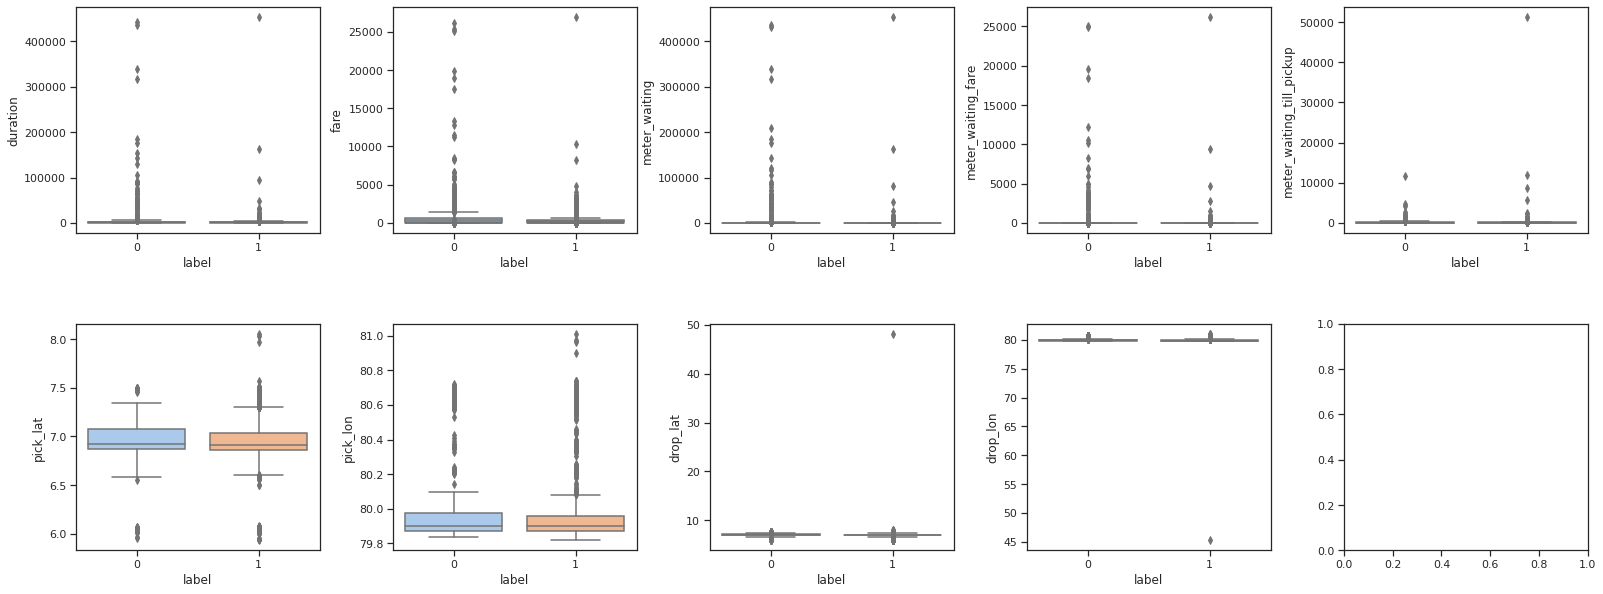

In [ ]:
f, ax = plt.subplots(2,5, figsize=(10,10),)

plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=0.3, hspace=0.4)
sns.set(style="ticks", palette="pastel")
sns.boxplot(data=dataframe,ax=ax[0,1], x='label',y='additional_fare')
sns.boxplot(data=dataframe,ax=ax[0,1], orient='v' , x='label', y='fare')
sns.boxplot(data=dataframe,ax=ax[0,2], orient='v' , x='label', y='meter_waiting')
sns.boxplot(data=dataframe,ax=ax[0,3], orient='v' , x='label', y='meter_waiting_fare')
sns.boxplot(data=dataframe,ax=ax[0,4], orient='v' , x='label', y='meter_waiting_till_pickup')
sns.boxplot(data=dataframe,ax=ax[1,0], orient='v' , x='label', y='pick_lat')
sns.boxplot(data=dataframe,ax=ax[1,1], orient='v' , x='label', y='pick_lon')
sns.boxplot(data=dataframe,ax=ax[1,2], orient='v' , x='label', y='drop_lat')
sns.boxplot(data=dataframe,ax=ax[1,3], orient='v', x='label', y='drop_lon')
sns.boxplot(data=dataframe,ax=ax[0,0], orient='v', x='label', y='duration')
plt.show()

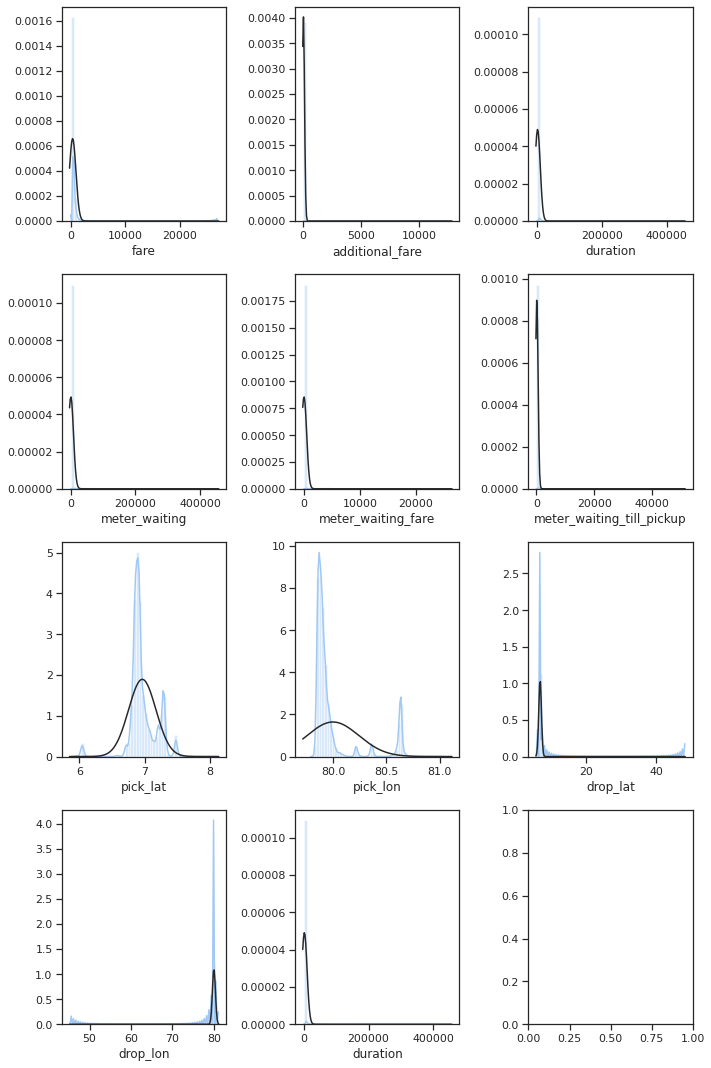

In [ ]:
#KDE plots
#Histograms

f, axes = plt.subplots(4,3, figsize=(10,15),)
plt.subplots_adjust(left=0.9, bottom=None, right=2, top=0.9, wspace=0.2, hspace=0.2)
sns.distplot(dataframe['fare'], kde=True, color="b", ax=axes[0, 0],fit=norm)
sns.distplot(dataframe['additional_fare'], kde=True, color="b", ax=axes[0, 1],fit=norm)
sns.distplot(dataframe['duration'], kde=True, color="b", ax=axes[0, 2],fit=norm)
sns.distplot(dataframe['meter_waiting'], kde=True, color="b", ax=axes[1, 0],fit=norm)
sns.distplot(dataframe['meter_waiting_fare'], kde=True, color="b", ax=axes[1, 1],fit=norm)
sns.distplot(dataframe['meter_waiting_till_pickup'], kde=True, color="b", ax=axes[1, 2],fit=norm)
sns.distplot(dataframe['pick_lat'], kde=True, color="b", ax=axes[2, 0],fit=norm)
sns.distplot(dataframe['pick_lon'], kde=True, color="b", ax=axes[2, 1],fit=norm)
sns.distplot(dataframe['drop_lat'], kde=True, color="b", ax=axes[2, 2],fit=norm)
sns.distplot(dataframe['drop_lon'], kde=True, color="b", ax=axes[3, 0],fit=norm)
sns.distplot(dataframe['duration'], kde=True, color="b", ax=axes[3, 1],fit=norm)
#sns.distplot(data_frame['label'], kde=False, color="b", ax=axes[3, 1])
f.tight_layout()
plt.show()